<a href="https://colab.research.google.com/github/heritonarantes/heritonarantes/blob/main/An%C3%A1lise_dos_dados_do_AirBnB_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introdução** 


### **Sobre o AirBNB**

O Airbnb nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco. Hoje, conta com 4 milhões de anfitriões que já receberam mais de 900 milhões de hóspedes em quase todos os países do mundo. Todos os dias, os anfitriões oferecem acomodações e experiências únicas, que possibilitam aos hóspedes vivenciar o mundo de uma forma mais autêntica e conectada.

Saiba Mais: [AirBnb](https://news.airbnb.com/br/about-us/)

### **Sobre a cidade do Rio de Janeiro**

Rio de Janeiro é um município brasileiro, capital do estado homônimo, situado no Sudeste do país. Maior destino turístico internacional no Brasil, da América Latina e de todo o Hemisfério Sul, a capital fluminense é a cidade brasileira mais conhecida no exterior, funcionando como um "espelho", ou "retrato" nacional, seja positiva ou negativamente. 

É a segunda maior metrópole do Brasil (depois de São Paulo), a sexta maior da América e a trigésima quinta do mundo. Sua população estimada pelo IBGE para 1.º de julho de 2020 era de 6 747 815 habitantes. Tem o epíteto de Cidade Maravilhosa e aquele que nela nasce é chamado de carioca.

É um dos principais centros econômicos, culturais e financeiros do país, sendo internacionalmente conhecida por diversos ícones culturais e paisagísticos, como o Pão de Açúcar, o morro do Corcovado com a estátua do Cristo Redentor, as praias dos bairros de Copacabana, Ipanema e Barra da Tijuca, entre outras; os estádios do Maracanã e Nilton Santos; o bairro boêmio da Lapa e seus arcos; o Theatro Municipal do Rio de Janeiro; as florestas da Tijuca e da Pedra Branca; a Quinta da Boa Vista; a Biblioteca Nacional; a ilha de Paquetá; o réveillon de Copacabana; o carnaval carioca; a Bossa Nova e o samba. Parte da cidade foi designada Patrimônio Cultural da Humanidade pela UNESCO em 1 de julho de 2012.

**Fonte de dados:** [Rio de Janeiro - Wiki](https://pt.wikipedia.org/wiki/Rio_de_Janeiro).

### **Quais os insghts que podemos obter da base de dados ?**

Neste projeto temos como objetivo responder os questionamentos abaixo:

* Quais os principais tipos de imóveis locados na cidade do Rio de Janeiro?
* Quais os bairros com maior custo de locação na cidade do Rio de Janeiro?
* Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?
* Qual a quantidade média de diárias por locação na cidade do Rio de Janeiro?
* Qual a disponibidade médias dos imóveis na cidade do Rio de Janeiro?

## **Análise dos Dados do Airbnb - Rio de Janeiro**

Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.

**Fonte de dados:** [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

**Arquivo baixado**: * `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).* 

**Data do arquivo:** 17/07/2021

##Importando os dados 

In [1]:
# Primeiro projeto do curso DSNP 3.0
# O projeto consiste em analisar os dados do AirBnB da cidade do RJ/RJ. O banco de dados é disponibilizado pelo próprio AirBnB.

# Primeiro passo é importar as bibliotecas que vamos utilizar.

!pip install wordcloud -q

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline


##Análisando os dados importados
Nesta estapa vamos demonstrar o significado das variáveis do conjunto de dados. Os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis (numéricas ou categóricas), bem como aspectos gerais úteis ao entendimento geral do problema.


In [2]:
# agora vamos importar o banco de dados do próprio AirBnB
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/visualisations/listings.csv")

 Dicionário das variáveis 

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias




Esta etapa é muito importante para visualizarmos a estrutura do nosso dataset com suas linhas e colunas dispostos em forma tabular (Data Frame) com a possibilidade de identificação prematura de dados faltantes, possíveis valores discrepantes, dentre outras questões.

In [3]:
#Vamos mostrar o conteúdo das 5 primeiras linhas para entender melhor o que estamos importando. 
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,170,5,265,2021-05-21,2.11,1,317
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,283,3,85,2017-04-22,0.88,1,154
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.89,2,316
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,256,2,181,2019-12-06,1.97,1,167
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,363,2019-06-15,3.05,1,92


In [4]:
# Comando para visualizarmos as 5 últimas linhas do Dataset.

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23630,51081209,2BR Ipanema Beauty Apartment with Ocean View,11070008,BlissRio,NaN,Ipanema,-22.985292,-43.197643,Entire home/apt,270,3,0,NaN,NaN,8,66
23631,51083443,Acolhedor flat à beira-mar na Barra da Tijuca,319227148,Anfitrião Prime,NaN,Barra da Tijuca,-23.009308,-43.355782,Entire home/apt,9440,1,0,NaN,NaN,12,220
23632,51084459,Duplex com churrasqueira e Wi-Fi em Lins no RJ,319227148,Anfitrião Prime,NaN,Méier,-22.903879,-43.273692,Entire home/apt,271,1,0,NaN,NaN,12,365
23633,51087547,Amplo apartamento com 3 quartos e dois banheiros,13411812,Fernando,NaN,Ipanema,-22.987000,-43.200670,Entire home/apt,600,3,0,NaN,NaN,4,358
23634,51091220,Cobertura 02 suites no coraçao de Copacabana,361834776,Guy,NaN,Copacabana,-22.965347,-43.181264,Entire home/apt,560,3,0,NaN,NaN,1,224


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nesta etapa, precisamos identificar a quantidade de entradas e quais os tipos de dados nas colunas.Em uma análise inicial percebe-se que o dataset apresenta um total de **23635** linhas, entradas ou observações, bem como um total de **16** colunas, variáveis ou features. 

O arquivo que baixamos é apenas um resumo fornecido pelo Airbnb. Existe um arquivo com mais variáveis, mas para fins de estudo, este é suficiente.

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23635
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 37% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,8% e 0,2% dos valores nulos.
* As outras variáveis não apresentam valores zerados/nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.366194
last_review                       0.366194
name                              0.000889
host_name                         0.000296
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para demonstrar as distribuições das variáveis, optamos por plotar em histograma. 

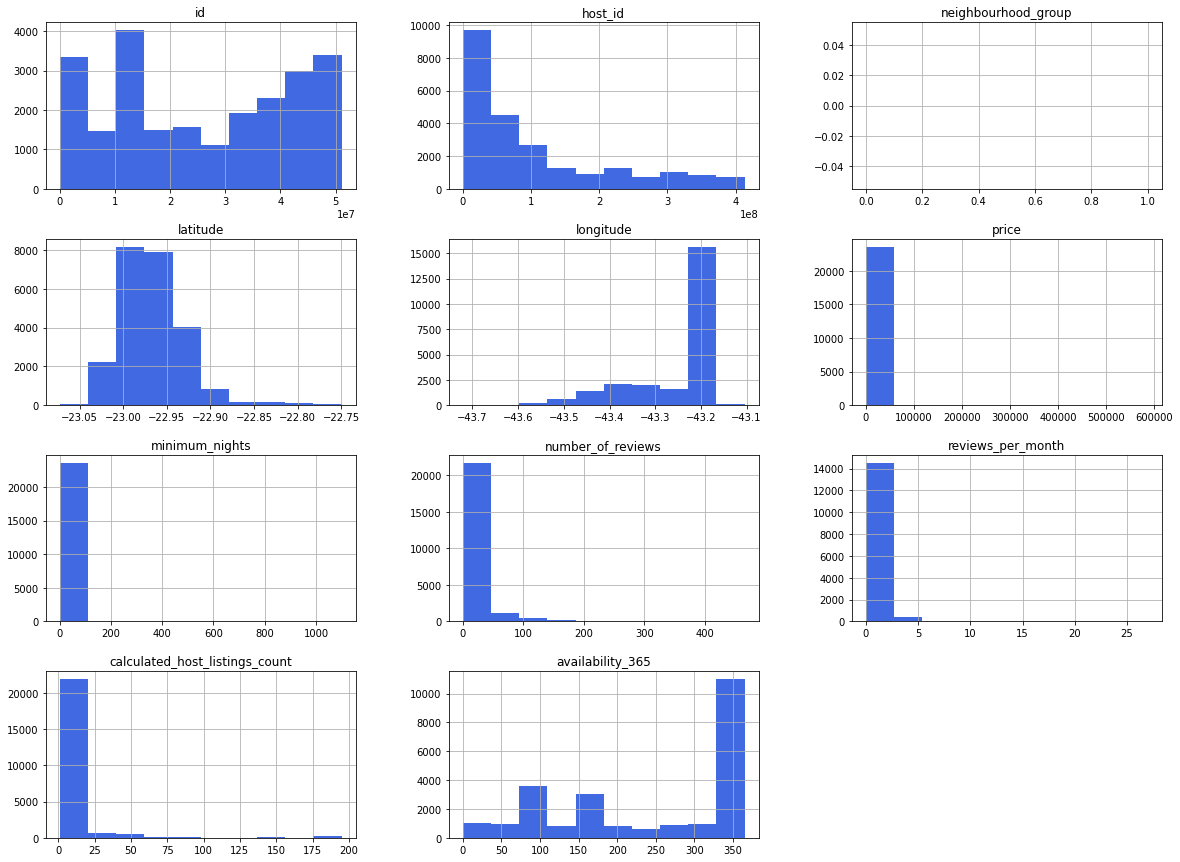

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(20,15), color= 'royalblue');

### **Q4. Há *outliers* presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de outliers. 

* price 
* minimum_nights 
* number_of_reviews
* reviews_per_month
* calculated_host_listings_count
* availability_365


Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Duas maneiras rápidas que auxiliam a detecção de outliers:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23635.000000,23635.000000,23635.000000,14980.000000,23635.000000,23635.000000
mean,751.329300,4.919018,13.207489,0.602536,7.396361,246.030379
std,5477.207312,20.702676,31.962546,0.864291,22.759622,123.474424
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,130.000000
50%,256.000000,2.000000,2.000000,0.240000,1.000000,297.000000
75%,511.000000,4.000000,10.000000,0.790000,3.000000,364.000000
max,586229.000000,1100.000000,466.000000,26.960000,195.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 511, porém seu valor máximo é 5826.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights# 

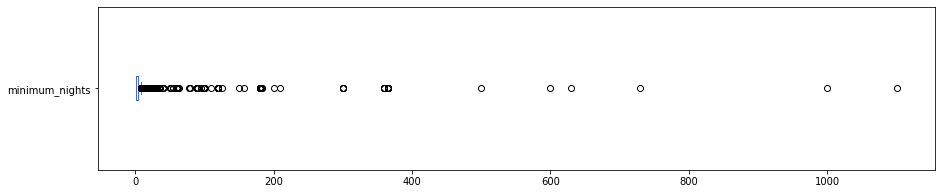

minimum_nights: valores acima de 30:
202 entradas
0.8547%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3), color= 'royalblue')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

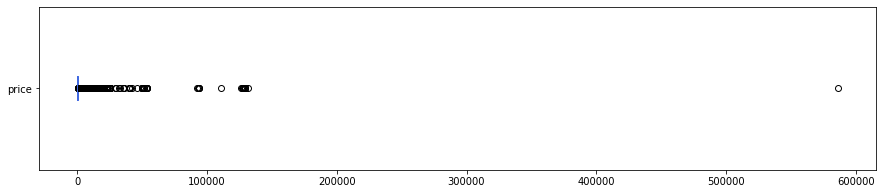


price: valores acima de 1500
1563 entradas
6.6131%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),color= 'royalblue')
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

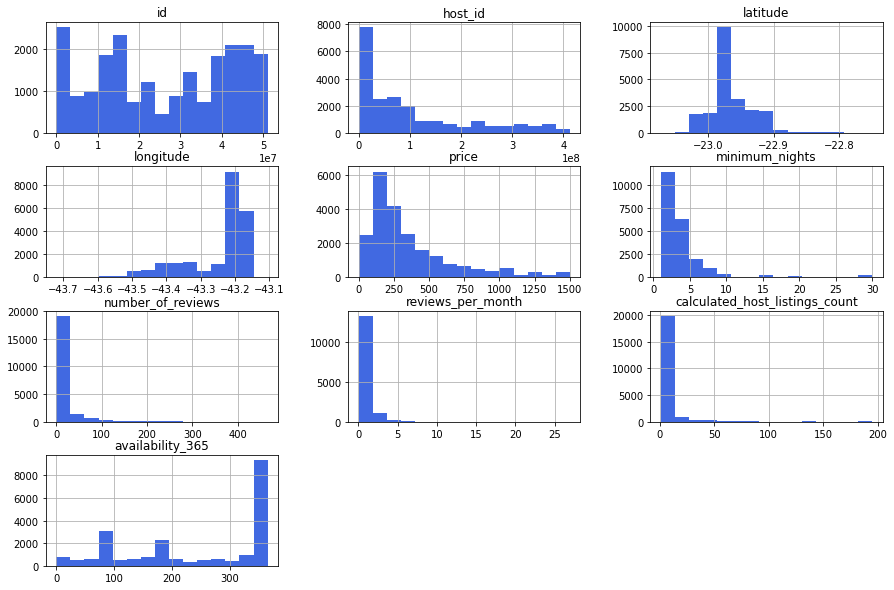

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color = ("royalblue"));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.133954,-0.160485,-0.158233,0.079018,0.129440
minimum_nights,0.133954,1.000000,-0.068339,-0.094496,-0.049724,0.011511
number_of_reviews,-0.160485,-0.068339,1.000000,0.637832,-0.052175,-0.139900
reviews_per_month,-0.158233,-0.094496,0.637832,1.000000,-0.001266,-0.190763
calculated_host_listings_count,0.079018,-0.049724,-0.052175,-0.001266,1.000000,0.016037
availability_365,0.129440,0.011511,-0.139900,-0.190763,0.016037,1.000000


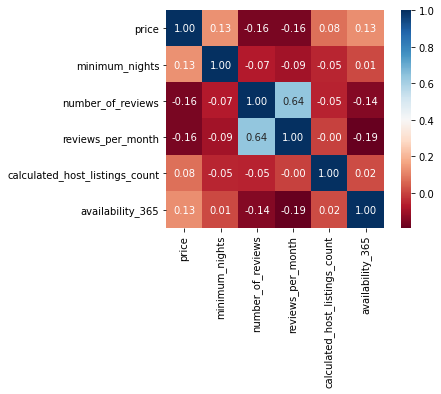

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

**Quanto matriz de correlação e o mapa de calor, podemos verificar que:**

* Conseguimos identificar na matriz e mapa de calor as correlação entre as variáveis plotadas duas a duas nos gráficos, ficando claro que o intervalo de análise varia de (-1 a +1) com forte correlação positiva ou negativa entre variáveis para valores próximos de (+1 ou -1), bem como fraca correlação para valores próximos de (0).

* No presente caso identificamos baixa correlação (0) entre as variáveis em análise, com exceção das variáveis numéricas **number_of_reviews** e **reviews_por_month)** que apresentam uma correlação positiva bastante interessante **(0.64)**.

## **Insghts dos dados analisados**

### **(01) Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    15593
Private room        5697
Shared room          516
Hotel room            83
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.712367
Private room       0.260268
Shared room        0.023573
Hotel room         0.003792
Name: room_type, dtype: float64

A coluna da variável categórica **room_type** indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de **espaço inteiro**(apartamentos/casas), **quarto inteiro**, **quarto compartilhado** e  **quarto de hotel**.

Numa simples análise podemos verificar **71%** dos imóveis locados pela AirBnb na cidade do Rio de Janeiro estão na categoria de **espaços inteiros** de casa e ou apartamentos (tenha um lugar só para você).

Na sequência com  **26%** temos os **quartos inteiros** (tenha seu próprio quarto e compartilhe alguns espaços comuns).

Na categoria de **quartos compartilhados** (fique em um espaço compartilhado, como um quarto comum) temos próximo de **2,3%**.

E por fim, temos **quarto de hotal** (fique em um quarto inteiro ou compartilhado em um hotel boutique, albergue e outros lugares) com ínfimos **0,3%**.

### **(02) Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação, e depois analisaremos a quantidade de quarto disponível por bairro.

In [34]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15] 

  

neighbourhood
Caju                  1208.000000
Anchieta               800.000000
Vaz Lobo               789.500000
Realengo               711.500000
Pavuna                 590.666667
Sepetiba               556.500000
Rocha Miranda          551.000000
Joá                    524.864865
Complexo do Alemão     520.000000
Lagoa                  507.689840
Paciência              507.250000
Manguinhos             500.000000
Pechincha              499.696970
Alto da Boa Vista      484.818182
Gardênia Azul          484.095238
Name: price, dtype: float64

In [25]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.neighbourhood.value_counts()

Copacabana             6498
Barra da Tijuca        2113
Ipanema                2103
Jacarepaguá            1118
Botafogo                993
                       ... 
Moneró                    1
Acari                     1
Vicente de Carvalho       1
Caju                      1
Ribeira                   1
Name: neighbourhood, Length: 153, dtype: int64

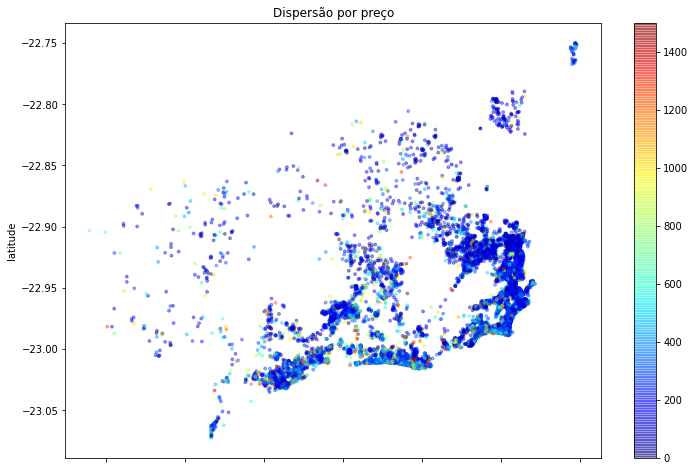

In [19]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'),title = "Dispersão por preço", figsize=(12,8));

In [65]:
# Verificando a quantidade de imóveis nos bairros Caju, Vaz Lobo, Realengo, Pavuna, Sepetiba, Rocha Miranda, Joá, Complexo do Alemão no contexto de todo dataset.

print(df_clean[df_clean.neighbourhood == "Caju"].shape)
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)
print(df_clean[df_clean.neighbourhood == "Realengo"].shape)
print(df_clean[df_clean.neighbourhood == "Pavuna"].shape)
print(df_clean[df_clean.neighbourhood == "Sepetiba"].shape)
print(df_clean[df_clean.neighbourhood == "Rocha Miranda"].shape)
print(df_clean[df_clean.neighbourhood == "Joá"].shape)
print(df_clean[df_clean.neighbourhood == "Complexo do Alemão"].shape)


(1, 15)
(2, 15)
(6, 15)
(3, 15)
(4, 15)
(2, 15)
(37, 15)
(2, 15)


**Com a análise realizada, podemos concluir que:**

* A coluna da variável numérica **price** indica o preço para alugar o imóvel na Airbnb. Dessa forma, combinando os valores da variável **price** com os valores da variável **neighbourhood** podemos encontrar os valores médios por bairro na cidade do Rio de Janeiro com uso da função groupby.

* No output acima, podemos identificar que bairros como Caju, Vaz Lobo, Realengo, Pavuna, Sepetiba, Rocha Miranda, Joá, Comploexo do Alemão, estão com média de preço de locação superior a de lugares como Lagoa, Leblon e Barra da Tijuca. Se analisarmos o [IDH](https://pt.wikipedia.org/wiki/Lista_de_bairros_do_Rio_de_Janeiro_por_IDH) desses bairros, e suas características de localização, podemos concluir que a realidade não é condizente com os dados apresentados inicialmente. Uma explicação que já conseguimos concluir, é a quantidade de quarto disponível por bairro, o que pode gerar uma distorção em nossa análise.

* O que nos leva a necessidade **insvestigarmos novamente** nossa base de dados para verificar a representatividade das amostras de bairros como Caju, Vaz Lobo, Realengo, Pavuna, Sepetiba, Rocha Miranda, Joá, Complexo do Alemão no conjunto de toda base de dados. Podemos concluir, que a quantidade de imóveis nesses bairros, é muito inferior à quantidade total de quartos disponíveis.



### **(03) Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?**


### **(04) Qual é a média do mínimo de noites para aluguel ?**


### **(05) Qual a disponibidade médias dos imóveis ?**


In [66]:
# Calculando as estatisticas descritivas do dataset df_clean com a retirada dos outliers.

df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21889.000000,21889.000000,21889.000000,14492.000000,21889.000000,21889.00000
mean,354.213303,3.525561,14.071680,0.614011,7.124263,242.53648
std,308.369729,4.331023,32.945377,0.872029,22.359938,123.74739
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.00000
25%,148.000000,1.000000,0.000000,0.090000,1.000000,121.00000
50%,250.000000,2.000000,2.000000,0.260000,1.000000,281.00000
75%,450.000000,4.000000,11.000000,0.820000,3.000000,364.00000
max,1500.000000,30.000000,466.000000,26.960000,195.000000,365.00000


Quanto às questões ligadas ao custo médio das locações, quantidade média de diárias, bem como a média de dias de disponibilidade de imóveis, podemos verificar que:

O valor médio de uma diária na cidade do Rio de Janeiro fica em torno de 354,21 reais, com desvio padrão de 308.69,com valores máximos chegando a 1.500,00 reais. Cabendo ressaltar que 75% dos preços estão abaixo do valor de 450,00 reais.

Já quantidade média de noites ficou em torno de 3,52 noites, com desvio padrão de 4.33, com valores mínimos de 1 noite e máximo chegando a 30 dias. Sendo importante frisar que 75% das reservas são de 4 noites.

E finalizando a análise podemos constatar que a disponibilidade média dos imóveis na cidade do Rio de Janeiro ficou em torno de 242 dias, com desvio padrão de 123.74, , valores máximos chegando a 1 ano. Por fim, cabe ressaltar que 75% dos imóveis ficaram disponíveis por 364 dias.

## Conclusões

O fodo do projeto foi realizar uma análise exploratória de dados das operações da AirBnb na cidade do Rio de Janeiro. Os dados analisados foram coletados diretamente no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

**Resultados:**

* **70%** dos imóveis locados pela AirBnb na cidade do Rio de Janeiro estão na categoria de **espaços inteiros de casa e ou apartamentos**.

* **Lagoa, Leblon e Barra da Tijuca** estão entre os bairros com maiores médias de preços na locação de imóveis na plataforma AirBnb.

* **O valor médio** de uma diária na cidade do Rio de Janeiro fica em torno de **354,21 reais**, cabendo ressaltar que 75% dos preços estão abaixo do valor de **450,00 reais**.

* Já quantidade média de noites de locação ficou em torno de **3,52 noites**, sendo importante frisar que 75% das reservas são de 4 noites.

* E finalizando a análise podemos constatar que a disponibilidade média dos imóveis na cidade do Rio de Janeiro ficou em torno de **242 dias**, cabendo ressaltar que 75% dos imóveis ficaram disponíveis por **364** dias.

Por fim, lembra-se que o presente dataset é uma versão resumida, ideal apenas para uma abordagem inicial do problema. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
